<a href="https://colab.research.google.com/github/ibudeX/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram


from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("joebeachcapital/customer-segmentation")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/customer-segmentation


In [ ]:
os.listdir(path)

['Mall_Customers.csv']

In [ ]:
data= pd.read_csv(os.path.join(path, 'Mall_Customers.csv'))

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0})
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [ ]:
# drop customer id and scale numerical column the mount on a data frame
data1 = data.drop('CustomerID', axis=1)

scaler = StandardScaler()
data1[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(data1[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
data1


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913
3,0,-1.137502,-1.700830,1.040418
4,0,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,0,-0.276302,2.268791,1.118061
196,0,0.441365,2.497807,-0.861839
197,1,-0.491602,2.497807,0.923953
198,1,-0.491602,2.917671,-1.250054


In [ ]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

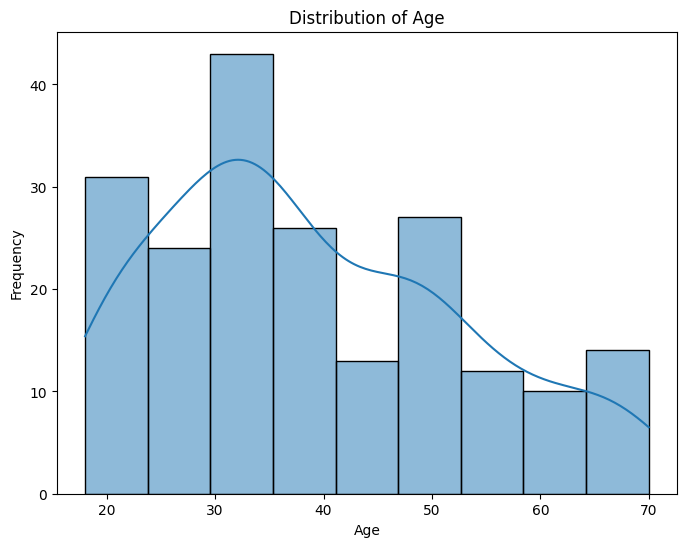

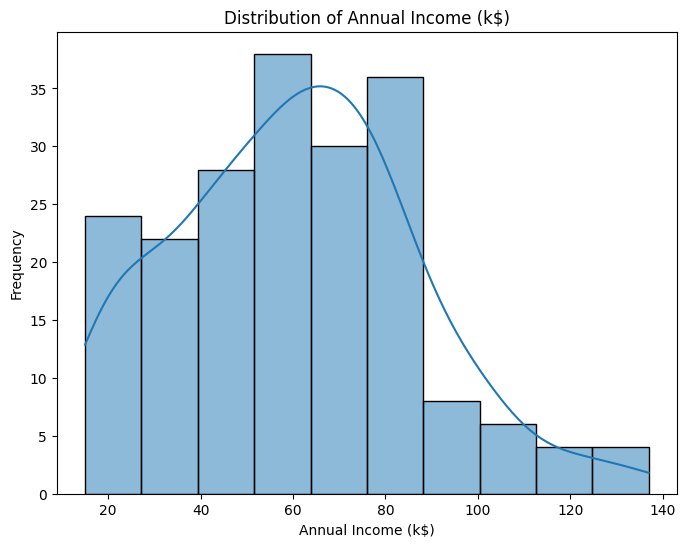

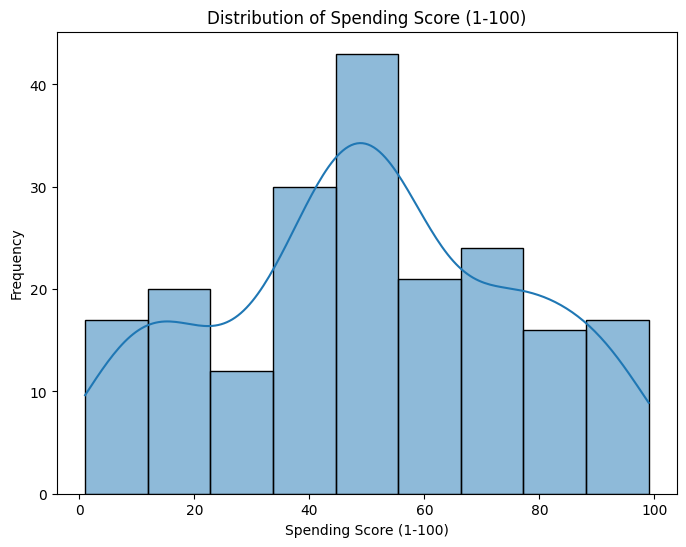

In [ ]:
# Create histograms for all columns
for column in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.histplot(data[column], kde=True)  # kde=True adds a kernel density estimate curve
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

<Figure size 800x600 with 0 Axes>

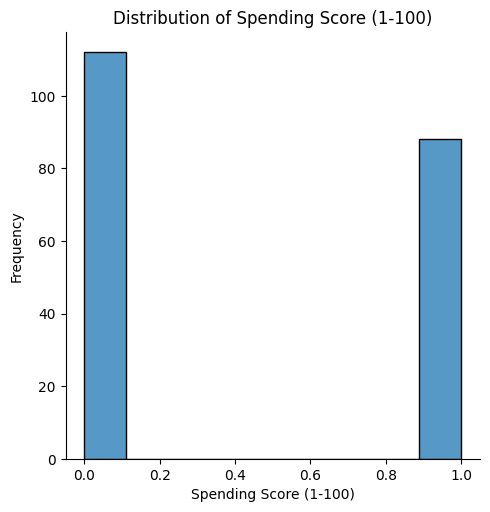

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.displot(data["Gender"])  # kde=True adds a kernel density estimate curve

plt.title(f'Distribution of {column}')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

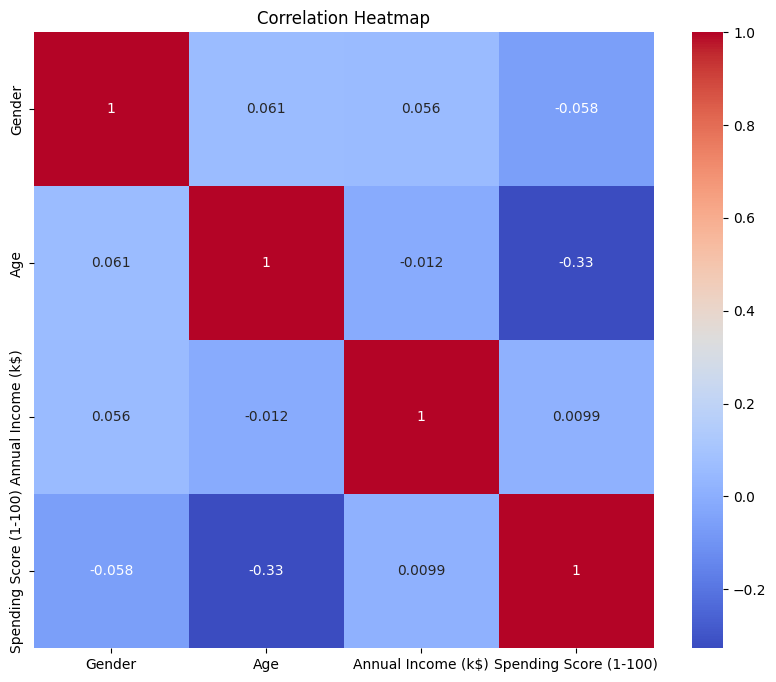

In [ ]:
#plot correlation on heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data1.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

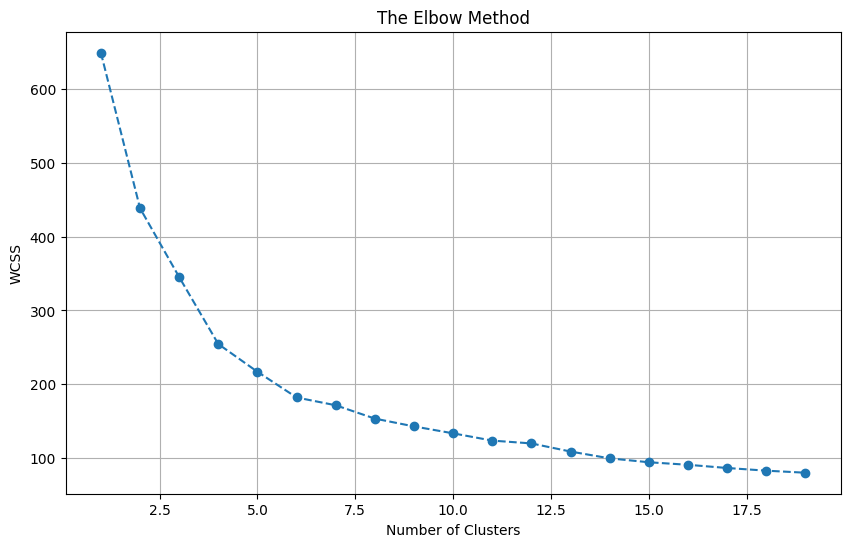

In [ ]:
#the elbow method
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data1)
    wcss.append(kmeans.inertia_)

#plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

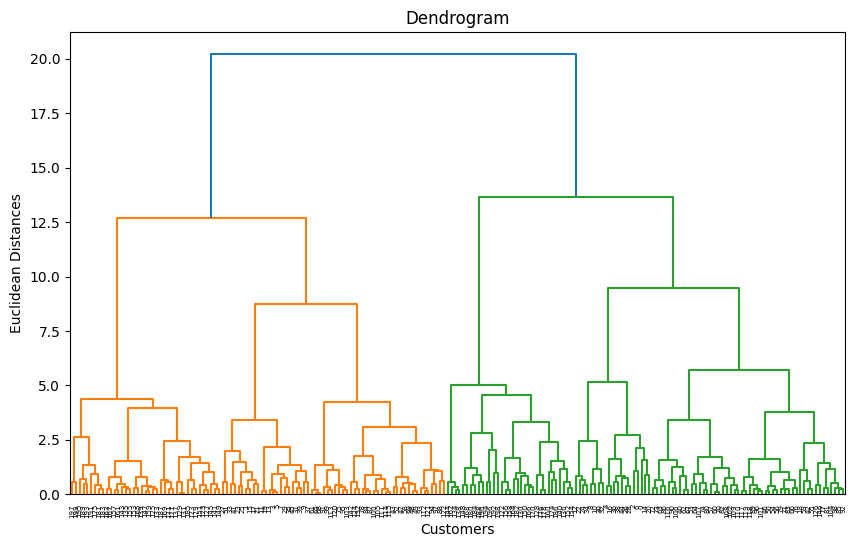

In [ ]:

import scipy.cluster.hierarchy as sch

#plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram=sch.dendrogram(sch.linkage(data1, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [ ]:
kmeans= KMeans(n_clusters=6, init='k-means++')
y_kmeans = kmeans.fit_predict(data1)

In [ ]:
kmeans.cluster_centers_

array([[ 5.75757576e-01,  1.34725649e-01,  1.08669522e+00,
        -1.29122864e+00],
       [ 1.66533454e-16,  9.66287215e-01, -4.51053597e-01,
        -3.19445985e-01],
       [ 3.55555556e-01, -8.20133781e-01, -3.93738867e-01,
        -2.00146713e-01],
       [ 4.61538462e-01, -4.41917193e-01,  9.91583048e-01,
         1.23950275e+00],
       [ 4.09090909e-01, -9.74395918e-01, -1.32954532e+00,
         1.13217788e+00],
       [ 1.00000000e+00,  1.43505777e+00, -4.52983041e-01,
        -4.01952467e-01]])

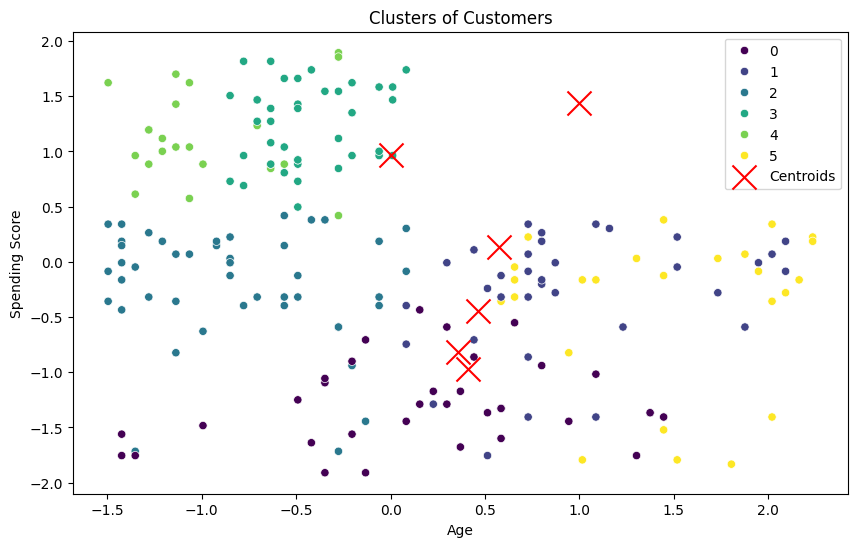

In [ ]:
#plot cluster with centriod on scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data1, x='Age', y='Spending Score (1-100)', hue=y_kmeans, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red',marker="x", label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


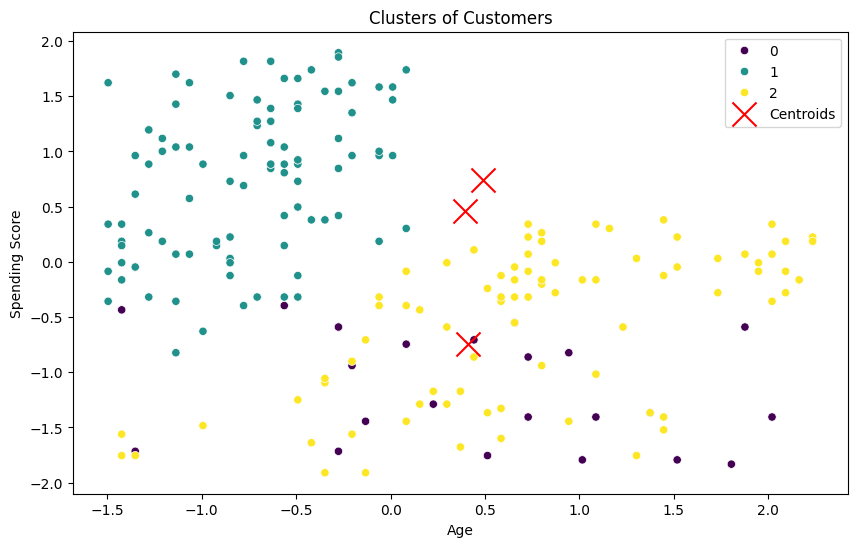

In [ ]:
kmeans= KMeans(n_clusters=3, init='k-means++')
y_kmeans = kmeans.fit_predict(data1)


#plot cluster with centriod on scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data1, x='', y='Spending Score (1-100)', hue=y_kmeans, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red',marker="x", label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [ ]:
#train Hierarchical model
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_hc = hc.fit_predict(data1)

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

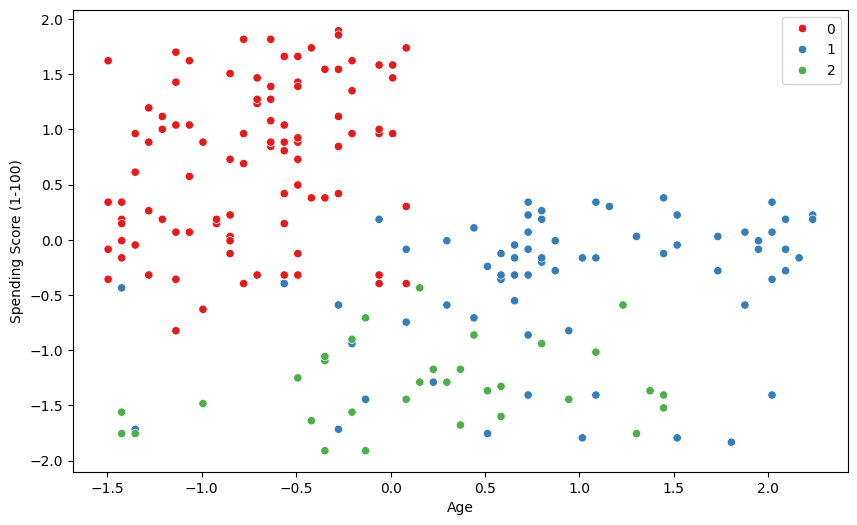

In [ ]:
#plot the model
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data1, x='Age', y='Spending Score (1-100)', hue=y_hc, palette='Set1')

In [ ]:
#traib DBSAN Model
dbscan = DBSCAN(eps=.6, min_samples=7)
y_dbscan = dbscan.fit_predict(data1)

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

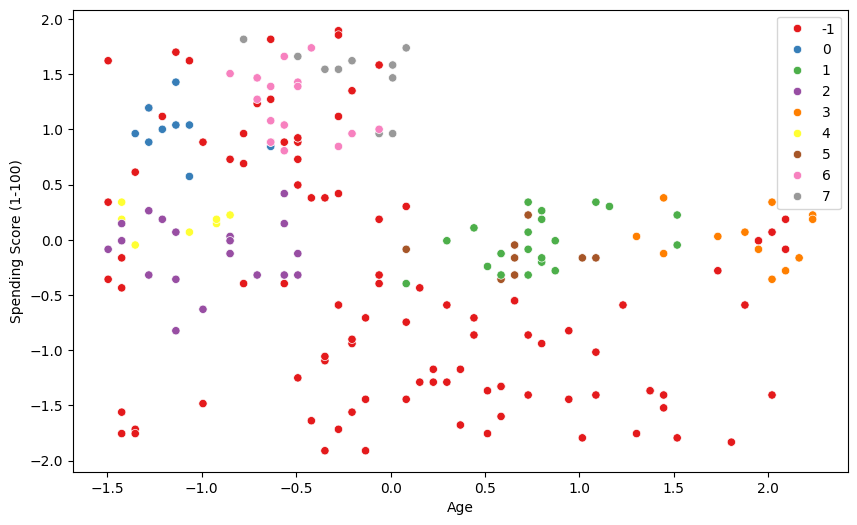

In [ ]:
#plot Model
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data1, x='Age', y='Spending Score (1-100)', hue=y_dbscan, palette='Set1')